<a href="https://colab.research.google.com/github/ManavKaul/Black-Friday-Sale/blob/main/Black_Friday_Sale_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the Black Friday Sales Data from Kaggle
df= pd.read_csv('BlackFriday.csv')

In [ ]:
df.shape

(537577, 12)

* ***There are 537,577 sales entries***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [ ]:
#Reading the top 5 rows of data
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Reading the last 5 rows of data
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


# **AGE**

In [ ]:
print(df["Age"].unique())

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [ ]:
AgesGroup =df[['Age', 'Purchase']].groupby(['Age'],sort = True).count()

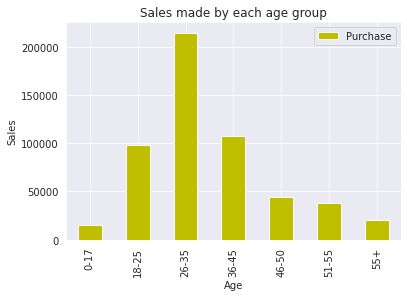

In [30]:
AgesGroup.plot(kind='bar', color=['y'])
plt.ylabel('Sales')
plt.title("Sales made by each age group")
plt.show()
sns.set_style('darkgrid')

# **Gender**

In [27]:
print(df["Gender"].unique())

['F' 'M']


All Entries of the data belong to either Male gender or Female gender


In [28]:
GenderGroup =df[['Gender', 'Purchase']].groupby(['Gender'],sort = True).count()

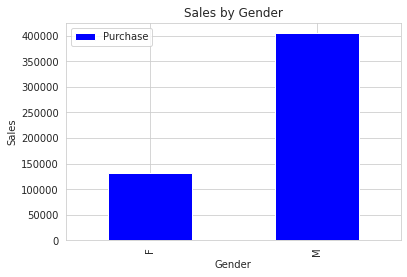

In [32]:
GenderGroup.plot(kind='bar',color=['b'],ylabel='Sales',title='Sales by Gender')
plt.show()
sns.set_style('whitegrid')

# **Market Segmentation (On the basis of Age and Gender)**

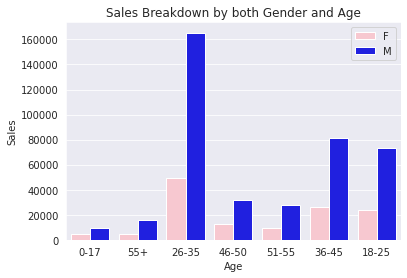

In [34]:
sns.countplot(df['Age'],hue=df['Gender'],palette =['pink','b'])
plt.xlabel("Age")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales Breakdown by both Gender and Age")
plt.show()
sns.set_style('darkgrid')

# **CITY**

In [ ]:
print(df['City_Category'].unique())

['A' 'C' 'B']


The Cities are divided into 3 categories: A, B & C

In [ ]:
City_A=0
City_B=0
City_C=0
for i in range( 537577):
  if df["City_Category"][i]=='A':
    City_A= City_A+1
  elif df["City_Category"][i]== 'B':
    City_B= City_B+1
  elif df["City_Category"][i]== 'C':
    City_C= City_C+1

*FOLLOWING DATA REPRESENTS THE NUMBER OF BUYERS FROM EACH CITY CATEGORY*

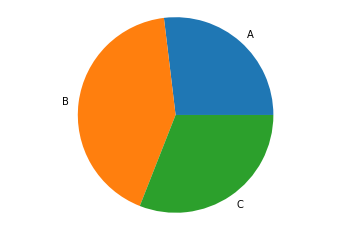

Number of buyers from each city category


In [ ]:
plt.pie([City_A,City_B,City_C], labels=['A','B','C'],radius=40)
plt.axis('equal')
plt.show()
print('Number of buyers from each city category')

*FOLLOWING DATA REPRESENTS THE SALES FROM EACH CITY*

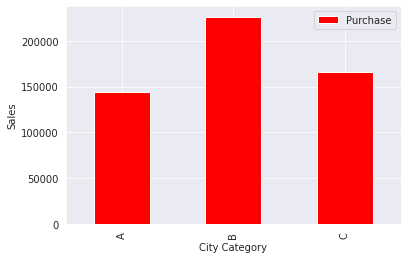

In [38]:
CityCategory =df[['City_Category', 'Purchase']].groupby(['City_Category'],sort = True).count()
CityCategory.plot(kind='bar',color='r')
plt.xlabel("City Category")
plt.ylabel("Sales")
plt.show()
sns.set_style('darkgrid')

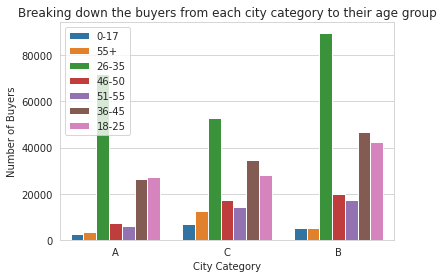

In [36]:
sns.countplot(df['City_Category'],hue=df['Age'])
plt.xlabel("City Category")
plt.ylabel("Number of Buyers")
plt.legend()
plt.title("Breaking down the buyers from each city category to their age group")
plt.show()
sns.set_style('whitegrid')

# **Marital Status**

In [ ]:
print(df['Marital_Status'].unique())

[0 1]


*There are two Marital Status*

*Taking 0 as Bachelor* 

*Taking 1 as Married*

In [ ]:
Bachelor=0
Married=0
for i in range(537577):
  if df['Marital_Status'][i]==0:
    Bachelor=Bachelor+1
  elif df['Marital_Status'][i]==1:
    Married=Married +1

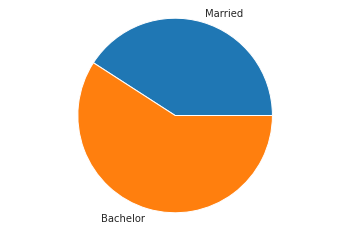

	   Marital status of buyers


In [40]:
plt.pie([Married,Bachelor], labels=['Married','Bachelor'])
plt.axis('equal')
plt.show()
print("\t   Marital status of buyers") 

# **PRODUCT CATEGORY**

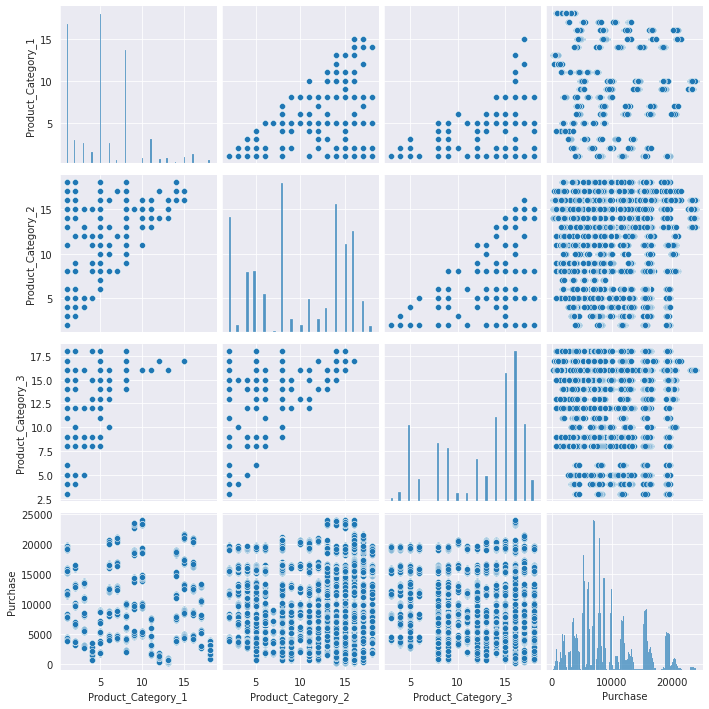

In [26]:
sns.set_style('darkgrid')
compare_df=df[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']]
sns.pairplot(compare_df)

# **OVERALL SALES**

In [ ]:
df['Purchase'].sum()

5017668378

*Total Sales was over 5 Billion$*